In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns

In [46]:
master = pd.read_csv("../data/master.csv")
master = master.drop('ENDOWMENT03', axis=1)

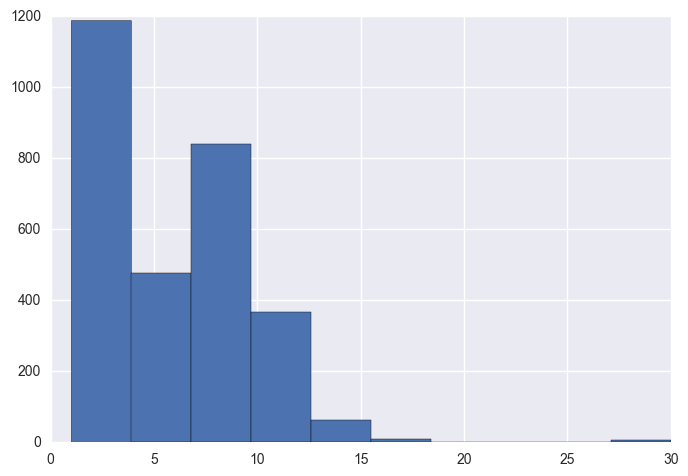

In [47]:
nans = pd.isnull(master)
nans_copy = pd.isnull(master)

from collections import Counter

university_nans = Counter()
column_count_nans = Counter()

for index, row in zip(nans_copy.index, nans_copy.values):
    row_data = dict(zip(nans_copy.columns.values, row))
    for column, value in row_data.items():
        if value:
            university_nans[index] += 1
            column_count_nans[column] += 1
            
# A good number of our institutions have between 0 and 10 NaN values.
university_nan_dist = pd.DataFrame.from_dict(university_nans, orient='index').reset_index()
university_nan_dist = university_nan_dist.rename(columns={'index':'event', 0:'count'})
plt.hist(university_nan_dist['count'])

# Feature to NaN DataFrame
column_nan_dist = pd.DataFrame.from_dict(column_count_nans, orient='index').reset_index()
column_nan_dist = column_nan_dist.rename(columns={'index':'event', 0:'count'})
column_nan_dist['count'] = column_nan_dist['count'].astype(int)

In [55]:
import statsmodels.stats.api as sms

conf_interval = {feature: 0 for feature in column_nan_dist['event']}

for feature in conf_interval.keys():
    valid, invalid = master[master[feature].notnull()], master[master[feature].isnull()]
    valid, invalid = valid['DRate 1'], invalid['DRate 1']
    
    cm = sms.CompareMeans(sms.DescrStatsW(invalid), sms.DescrStatsW(valid))
    conf_interval[feature] = cm.tconfint_diff(usevar='unequal')
    
pprint(conf_interval)

{'ACADSUPP01': (2.5303419360838744, 3.4402916645325989),
 'CERTIFICATES_AWARDS_100FTE': (-5.0961789305477616, -4.1897870572708555),
 'FED_GRANT_PCT': (-8.3490892533184997, -7.3818848886231789),
 'FT_FACULTY_PER_100FTE': (-2.767175919857924, -0.03375633457421312),
 'FT_FIRST_TIME_FIRST_YR_DEG_SEEK': (-8.3289256659697202, -7.377108316145037),
 'GRANT01': (-8.2559830511330823, -6.9233030715492667),
 'GRANT02': (-0.4041207642315563, 0.64608561166785639),
 'GRANT07': (-6.7068444913146852, -2.8702504025999804),
 'INSTITUTIONAL_GRANT_AID_SHARE': (2.6150183073209754, 3.5739226117335376),
 'INST_GRANT_AVG_AMOUNT': (-0.89134100641792346, 0.084720696926640526),
 'INST_GRANT_PCT': (-8.3490892533184997, -7.3818848886231789),
 'LOAN_AVG_AMOUNT': (-7.585772115806197, -6.314193280813635),
 'LOAN_PCT': (-8.3490892533184997, -7.3818848886231789),
 'NETTUITION01': (-7.7243345543648081, -0.15345867697501436),
 'NETTUITION_SHARE': (-7.0170814760864255, -0.0058133661453014795),
 'NET_STUDENT_TUITION': (-7.7

In [62]:
imputable = """
GRANT02
INST_GRANT_AVG_AMOUNT
STUDSERV01
TOTAL03_REVENUE
TOTALCOMPLETIONS_100FTE
TOTAL_ENROLLMENT_ASIAN_TOT
TOTAL_ENROLLMENT_BLACK_TOT
TOTAL_ENROLLMENT_HISP_TOT
TOTAL_ENROLLMENT_WHITE_TOT
""".split()

cannot_impute = [feature for feature in conf_interval.keys() if feature not in imputable]
print(len(imputable), len(cannot_impute))



9 23


In [57]:
# fig = plt.figure()
# ax = fig.add_subplot(111)

# for feature, confidence in conf_interval.items():
#     plt.scatter(conf_interval[feature][0], conf_interval[feature][1])

# ax.axis([-30, 30, -30, 30])
# plt.show()